In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data files
# us_counties = pd.read_csv('us-counties.csv')  
us_states = pd.read_csv('us-states.csv')  
us = pd.read_csv('us.csv')  
historical_usa_doses = pd.read_csv('historical-usa-doses-administered.csv')  
historical_global_doses = pd.read_csv('historical-global-doses-administered.csv') 

# Calculate the number of new cases
us['new_cases'] = us['cases'].diff()

# Find the day with the highest number of new cases
peak_date = us.loc[us["new_cases"].idxmax(), "date"]
# Print detailed information for the day with the highest number of new cases
us.loc[us["new_cases"].idxmax()]

# Get the latest pandemic data
latest_status = us.iloc[-1]

# Print the peak date and the latest pandemic status
"The U.S. reached its coronavirus peak on " + peak_date
latest_status

date         2023-03-23
cases         103910034
deaths          1135343
new_cases       45146.0
Name: 1157, dtype: object

In [10]:
# Calculate the number of new cases for each state
us_states['new_cases_states'] = us_states.groupby('state')['cases'].diff().fillna(0)

# Calculate the number of new deaths for each state
us_states['new_deaths_states'] = us_states.groupby('state')['deaths'].diff().fillna(0)

# Find the peak date for new cases in each state
peak_date_states = us_states.loc[us_states.groupby('state')['new_cases_states'].idxmax()][['state', 'date']]

# Display the peak dates for each state
peak_date_states

,state,date
38478,Alabama,2022-01-29
37919,Alaska,2022-01-19
42232,American Samoa,2022-04-06
38089,Arizona,2022-01-22
37922,Arkansas,2022-01-19
37419,California,2022-01-10
37420,Colorado,2022-01-10
37421,Connecticut,2022-01-10
37590,Delaware,2022-01-13
37031,District of Columbia,2022-01-03


In [12]:
# List of U.S. states for filtering
us_states_list = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]

# Filter the latest_data to include only U.S. states
latest_data_states_only = latest_data[latest_data['state'].isin(us_states_list)]

# Calculate fatality rate
latest_data_states_only.loc[:, 'fatality_rate'] = latest_data_states_only['deaths'] / latest_data_states_only['cases']

# Sort by fatality rate
sorted_states = latest_data_states_only.sort_values(by='fatality_rate')

# Display the sorted states
sorted_states[['state', 'cases', 'deaths', 'fatality_rate']]

# Define regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# Map states to regions
latest_data_states_only['region'] = latest_data_states_only['state'].map(
    {state: region for region, states in regions.items() for state in states}
)

# Calculate regional fatality rates
regional_data = latest_data_states_only.groupby('region').agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index()

regional_data['fatality_rate'] = regional_data['deaths'] / regional_data['cases']

# Display regional fatality rates
regional_data[['region', 'cases', 'deaths', 'fatality_rate']]

,region,cases,deaths,fatality_rate
0,Midwest,21226609,239437,0.011280
1,Northeast,17925126,214471,0.011965
2,South,39652810,455487,0.011487
3,West,23679389,218047,0.009208


In [15]:
# Import necessary libraries
import pandas as pd

# Load the population data for U.S. states (assuming the data is in a CSV file named 'us_states_population_2023.csv')
# The CSV file should have columns: 'state' and 'population'
population_data = pd.read_csv('us_population.csv')

# Merge the population data with the latest_data_states_only dataframe
latest_data_with_population = latest_data_states_only.merge(population_data, on='state', how='left')

# Calculate the cumulative incidence rate (cases per 100,000 people) for each state
latest_data_with_population['cumulative_incidence_rate'] = (latest_data_with_population['cases'] / latest_data_with_population['population']) * 100000

# Calculate the cumulative incidence rate for each region
regional_population = latest_data_with_population.groupby('region')['population'].sum().reset_index()
regional_cases = latest_data_with_population.groupby('region')['cases'].sum().reset_index()
regional_data_with_population = regional_cases.merge(regional_population, on='region')
regional_data_with_population['cumulative_incidence_rate'] = (regional_data_with_population['cases'] / regional_data_with_population['population']) * 100000

# Display the dataframe with the new cumulative incidence rate column for states
# Check if 'deaths' and 'fatality_rate' columns exist before displaying
if 'deaths' in latest_data_with_population.columns and 'fatality_rate' in latest_data_with_population.columns:
    display_columns_states = ['state', 'cases', 'deaths', 'fatality_rate', 'population', 'cumulative_incidence_rate']
else:
    display_columns_states = ['state', 'cases', 'population', 'cumulative_incidence_rate']
latest_data_with_population[display_columns_states]

# Display the dataframe with the new cumulative incidence rate column for regions
# Check if 'deaths' and 'fatality_rate' columns exist before displaying
if 'deaths' in regional_data_with_population.columns and 'fatality_rate' in regional_data_with_population.columns:
    display_columns_regions = ['region', 'cases', 'deaths', 'fatality_rate', 'population', 'cumulative_incidence_rate']
else:
    display_columns_regions = ['region', 'cases', 'population', 'cumulative_incidence_rate']
regional_data_with_population[display_columns_regions]

,region,cases,population,cumulative_incidence_rate
0,Midwest,21226609,68909283,30803.700279
1,Northeast,17925126,56983517,31456.685975
2,South,39652810,129446318,30632.628732
3,West,23679389,78896805,30013.115233


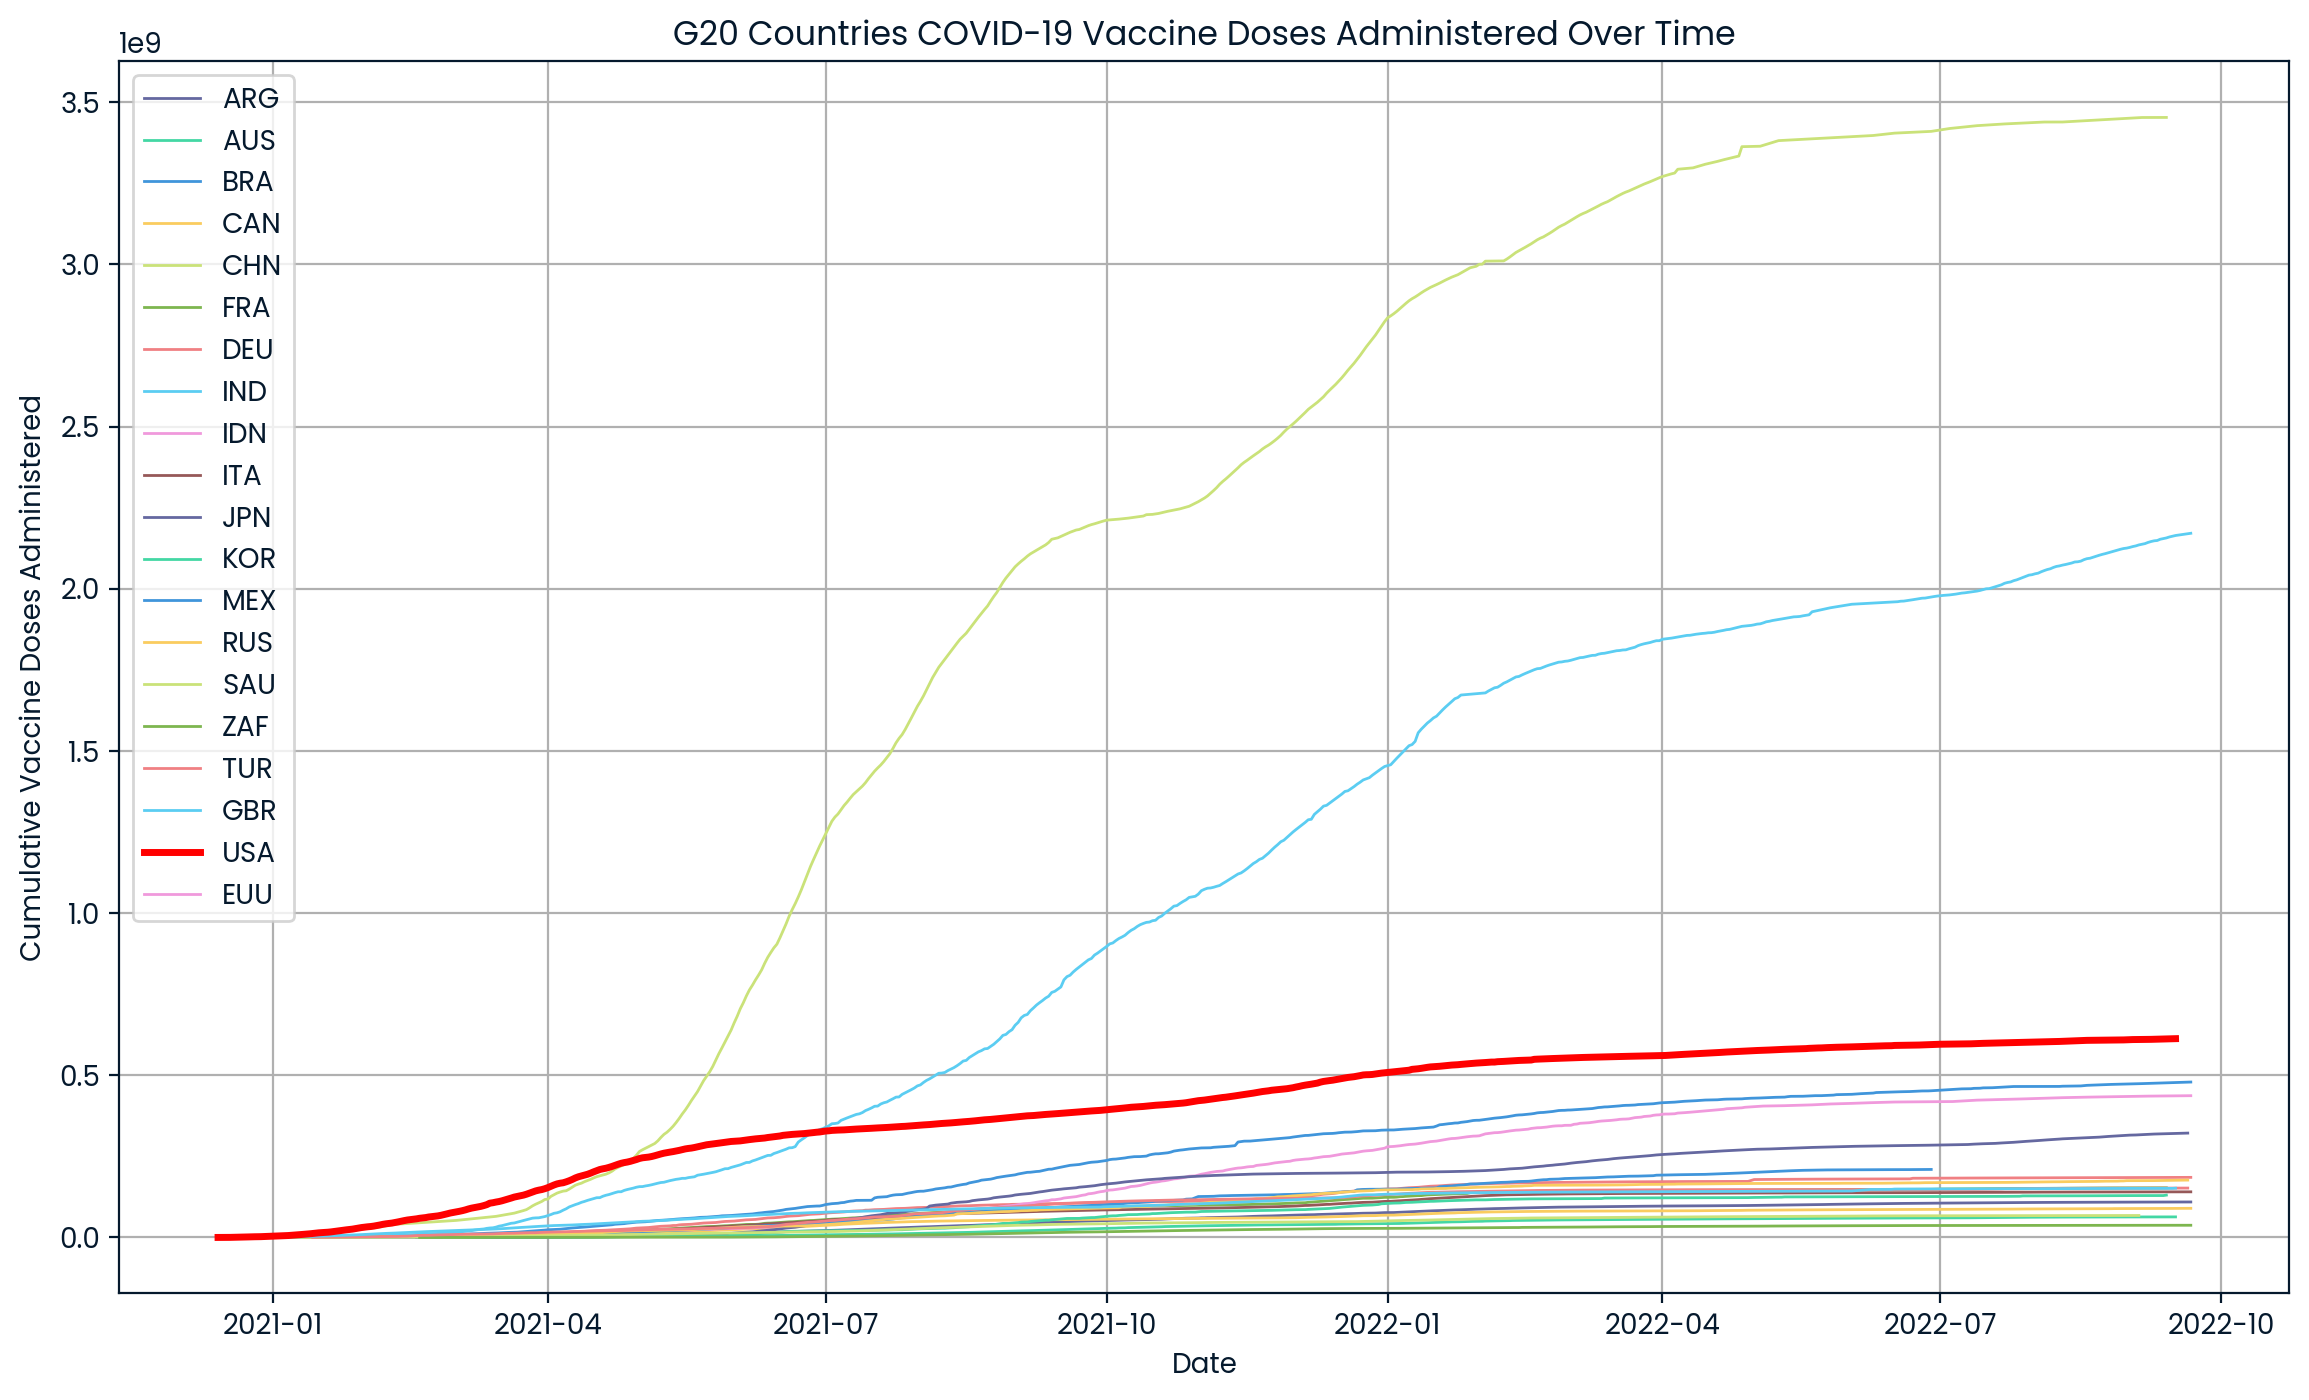

In [18]:

# Load the CSV file
file_path = 'historical-global-doses-administered.csv'
data = pd.read_csv(file_path)

# Define the three-letter codes for G20 countries
g20_countries = [
    'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'FRA', 'DEU', 'IND', 'IDN', 'ITA', 
    'JPN', 'KOR', 'MEX', 'RUS', 'SAU', 'ZAF', 'TUR', 'GBR', 'USA', 'EUU'
]

# Filter the data for G20 countries
g20_data = data[data['id'].isin(g20_countries)]

# Convert the date column to datetime type
g20_data['date'] = pd.to_datetime(g20_data['date'])

# Plot the data for each G20 country
plt.figure(figsize=(14, 8))

for country in g20_countries:
    country_data = g20_data[g20_data['id'] == country]
    if country == 'USA':
        plt.plot(country_data['date'], country_data['value'], label=country, linewidth=2.5, color='red')
    else:
        plt.plot(country_data['date'], country_data['value'], label=country, linewidth=1)

# Add legend and titles
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccine Doses Administered')
plt.title('G20 Countries COVID-19 Vaccine Doses Administered Over Time')
plt.legend()
plt.grid(True)
plt.show()


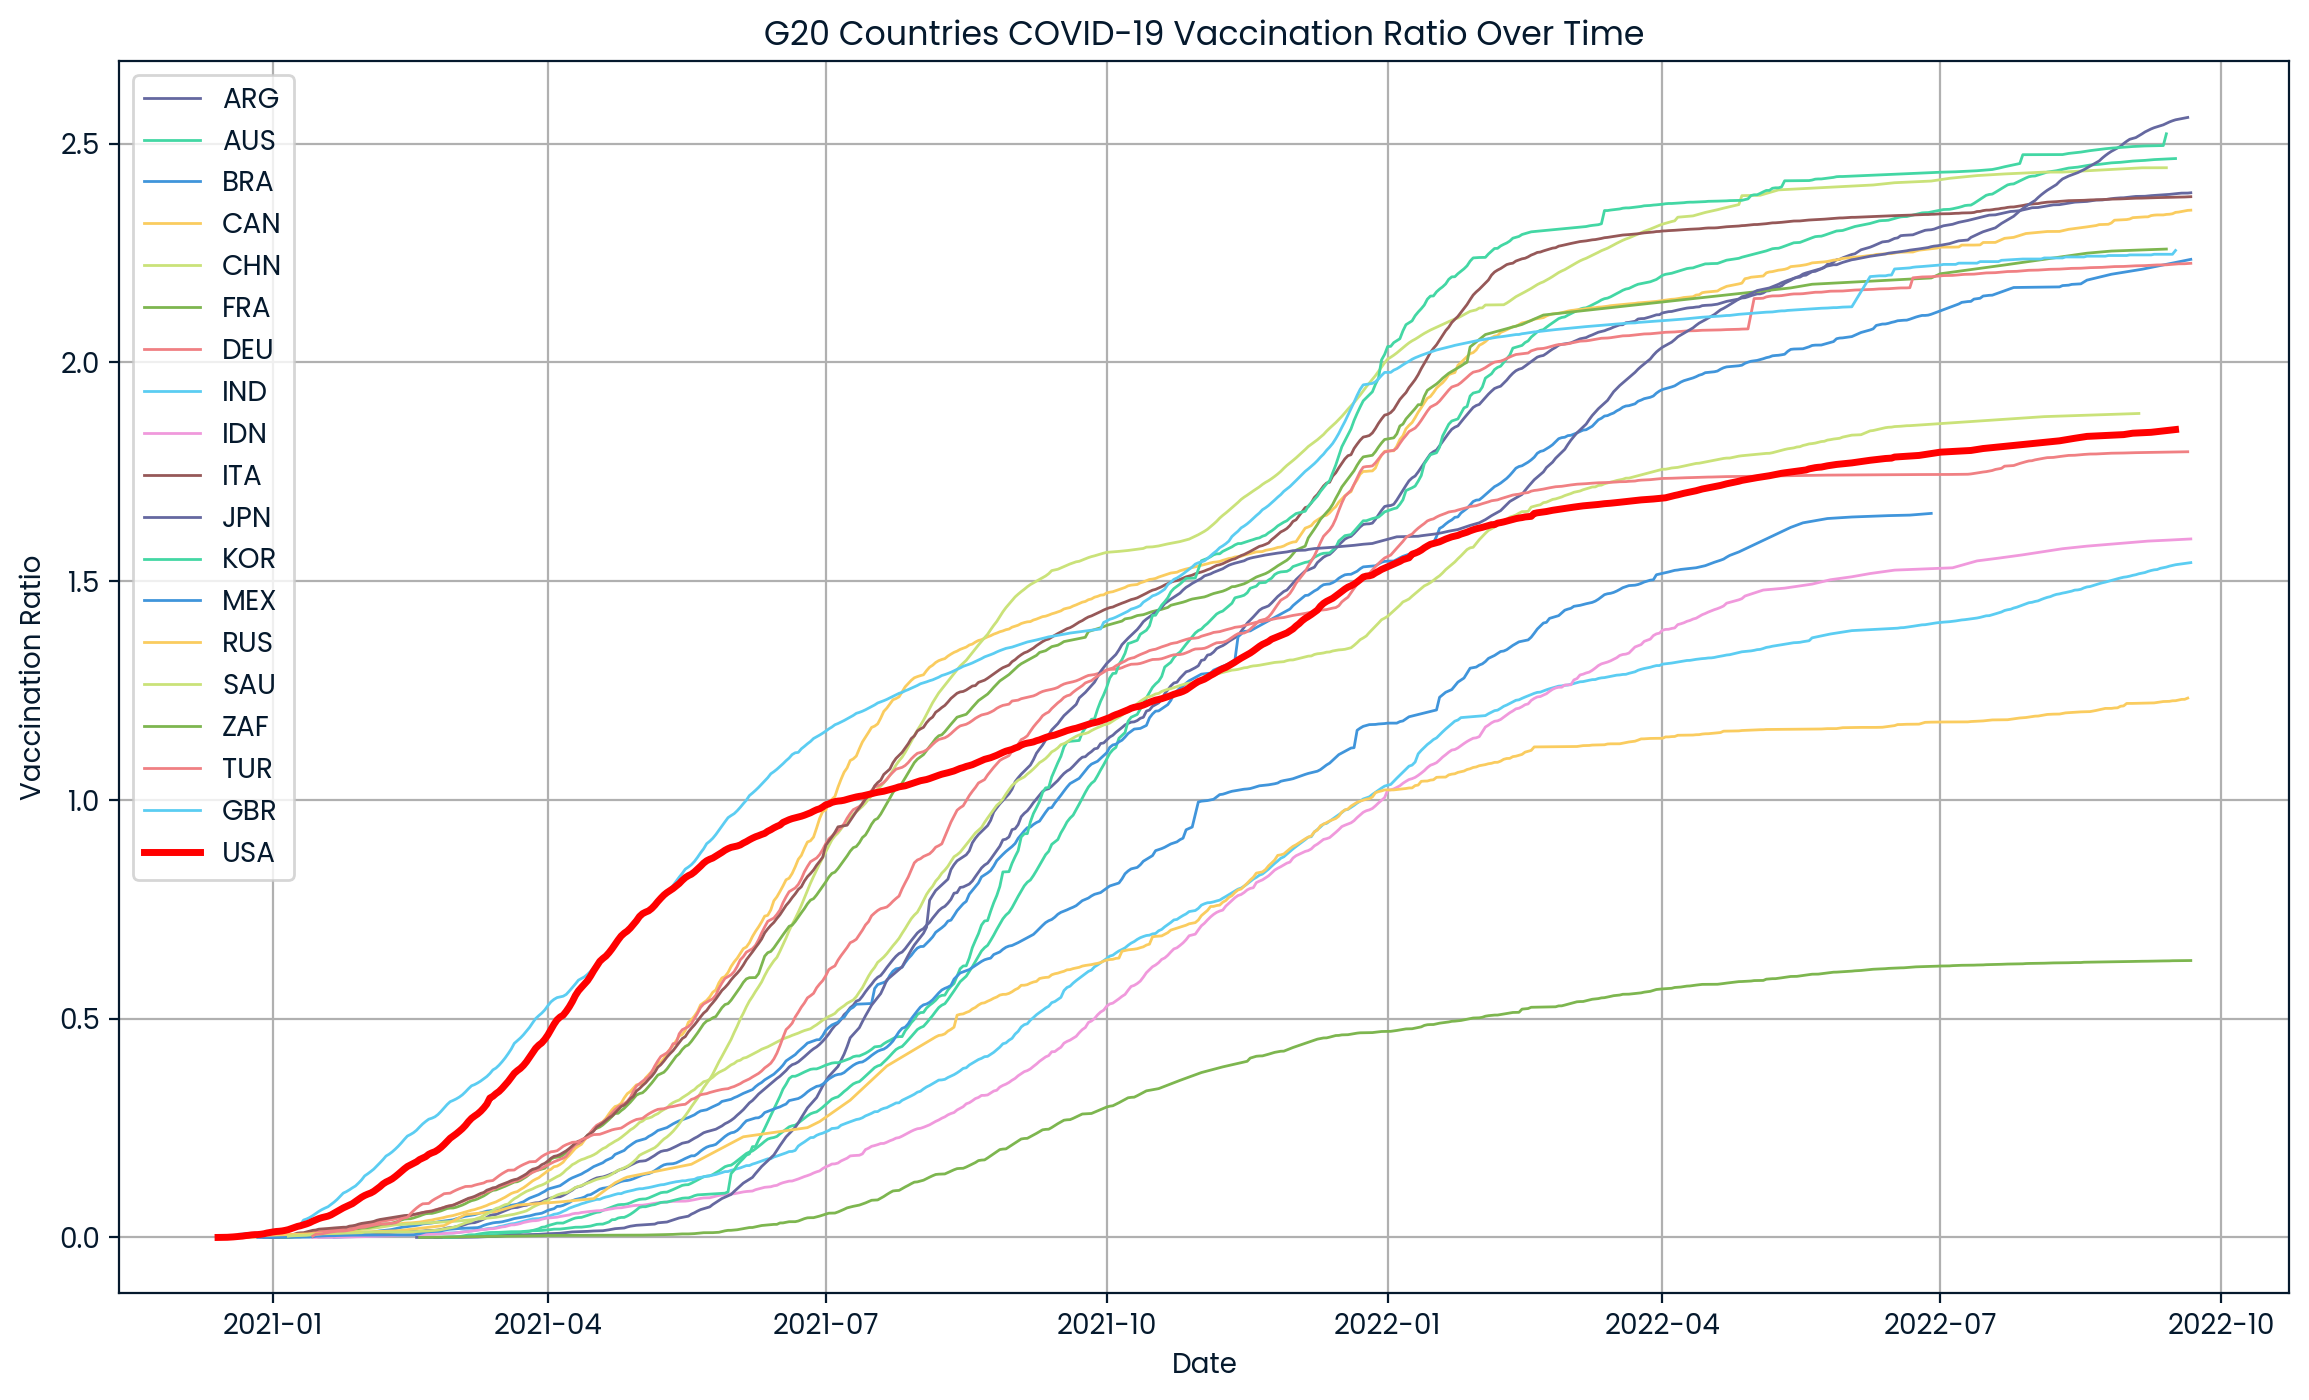

In [35]:
# Load the population data
population_data = pd.read_csv('population.csv')

# Filter the population data for G20 countries in 2021
g20_population_data_2021 = population_data[(population_data['id'].isin(g20_countries)) & (population_data['Year'] == 2021)]

# Merge the vaccination data with the population data
combined_data = pd.merge(g20_data, g20_population_data_2021, left_on='id', right_on='id')

# Calculate the vaccination ratio
combined_data['vaccination_ratio'] = combined_data['value'] / combined_data['population']

# Convert the date column to datetime type
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Plot the vaccination ratio for G20 countries
plt.figure(figsize=(14, 8))

# Assuming g20_countries is a list of country codes
for country_code in g20_countries:
    country_data = combined_data[combined_data['id'] == country_code]
    if not country_data.empty:
        # Assuming the correct column name for the country name is 'Country'
        country_name = country_data['Country'].iloc[0] if 'Country' in country_data.columns else country_code
        if country_code == 'USA':
            plt.plot(country_data['date'], country_data['vaccination_ratio'], label=country_name, linewidth=2.5, color='red')
        else:
            plt.plot(country_data['date'], country_data['vaccination_ratio'], label=country_name, linewidth=1)

plt.xlabel('Date')
plt.ylabel('Vaccination Ratio')
plt.title('G20 Countries COVID-19 Vaccination Ratio Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
print(combined_data)


       id       date     value  Year  population  vaccination_ratio
0     ARG 2020-12-31       700  2021    45808747           0.000015
1     ARG 2021-01-04     32013  2021    45808747           0.000699
2     ARG 2021-01-06     39599  2021    45808747           0.000864
3     ARG 2021-01-09    107542  2021    45808747           0.002348
4     ARG 2021-01-13    166833  2021    45808747           0.003642
...   ...        ...       ...   ...         ...                ...
8713  ZAF 2022-09-15  37562742  2021    59392255           0.632452
8714  ZAF 2022-09-17  37571929  2021    59392255           0.632607
8715  ZAF 2022-09-19  37580269  2021    59392255           0.632747
8716  ZAF 2022-09-20  37580608  2021    59392255           0.632753
8717  ZAF 2022-09-21  37587301  2021    59392255           0.632865

[8718 rows x 6 columns]
